#Week 4: Divide and Conquer

Integrantes:

- Juan Diego Castañeda Oviedo
- Sebastian Camilo Casas Rojas

##4-1:Binary Search

In [1]:
%%writefile ex4_1.py

def bs(s, t, r):
    l = 0

    while l<=r: 

        m = (l+r)//2

        if t > s[m]:
            l = m + 1
        elif t < s[m]:
            r = m - 1
        else:
            return m

    return -1

s = list(map(int, input().split()))
ss = list(map(int, input().split()))

n = s[0]
s = s[1:]
t = True

ln = []
x = ss[1:]

for i in x:
    ln.append(bs(s, i, n-1))

print(' '.join([str(i) for i in ln]))

Writing ex4_1.py


In [2]:
!python ex4_1.py

5 1 5 8 12 13
5 8 1 23 1 11
2 0 -1 0 -1


##4-2: Majority Element

In [3]:
%%writefile ex4_2.py

def df(l, r, s):
    
    if l+1==r:
        return s[l]
    elif l+2==r:
        return s[l]

    m = (l+r)//2

    c1 = 0
    c2 = 0

    left = df(l, m, s)
    right = df(m, r, s)

    for i in s[l:r]:
        if i == left:
            c1 = c1 + 1
        elif i == right:
            c2 = c2 + 1

    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

n = int(input())
s = list(map(int, input().split()))

if df(0, n, s) != -1:
    print(1)
else:
    print(0)

Writing ex4_2.py


In [4]:
!python ex4_2.py

5
2 3 9 2 2
1


In [5]:
!python ex4_2.py

4
1 2 3 4
0


In [6]:
!python ex4_2.py

4
1 2 3 1
0


##4-3: Improving Quick Sort

In [7]:
%%writefile ex4_3.py

import random

def p(a, l, r):
    
    x = a[l]
    m1 = l
    m2 = l
    for i in range(l + 1, r + 1):
    	if a[i] < x:
        	a[i],a[m1] = a[m1],a[i]
        	m1+=1
        	m2+=1
        	a[i],a[m2] = a[m2],a[i]
    	elif a[i] == x:
        	m2+=1
        	a[i],a[m2] = a[m2],a[i]

    return m1,m2


def sort_quick(a, l, r):

    if l >= r:
        return

    k = random.randint(l, r)
    a[l], a[k] = a[k], a[l]
    j,k = p(a, l, r)
    sort_quick(a, l, j-1)
    sort_quick(a, k+1, r)


n = int(input())

a = list(map(int, input().split()))

sort_quick(a, 0, n - 1)

for x in a:
    print(x, end=' ')

Writing ex4_3.py


In [8]:
!python ex4_3.py

5
2 3 9 2 2
2 2 2 3 9 

##4-4: Number of Inversions

In [9]:
%%writefile ex4_4.py

def merge(l, r):

    final = []
    j = 0
    ic = 0
    i = 0

    while i < len(l) and j< len(r):

        if l[i] <= r[j]:
            final.append(l[i])
            i += 1
        else:
            final.append(r[j])
            ic += len(l) - i
            j += 1

    final += l[i:]
    final += r[j:]
        
    return [final, ic]

def merge_sort(arr):

    global tc
    
    if len(arr) <= 1:
        return arr

    l = merge_sort(arr[:len(arr)//2])
    r = merge_sort(arr[len(arr)//2:])

    y = merge(l, r)
    sorted_arr = y[0]
    temp = y[1]

    tc += temp

    return sorted_arr

tc = 0

n = int(input())
s = list(map(int, input().split()))

merge_sort(s)
print(tc)

Writing ex4_4.py


In [10]:
!python ex4_4.py

5
2 3 9 2 9
2


##4-5: Organizing a Lottery

In [11]:
%%writefile ex4_5.py

def result(s, p, ml):
    
    for i in range(s):
        a, b = [int(i) for i in input().split()]
        ml.append((a,'l'))
        ml.append((b,'r'))

    points = input().split()
    for i in points:
        ml.append((int(i),'p'))

    ml.sort()

    segment_count = 0
    point_segment_map = dict()
    for i in ml:
        if i[1] == 'l': segment_count += 1
        elif i[1] == 'r': segment_count -= 1
        else:
            point_segment_map[i[0]] = segment_count

    temp = ''
    for i in points:
        temp += str(point_segment_map[int(i)]) + ' '

    return temp[:-1]

s, p = list(map(int, input().split()))

ml = []

print(result(s, p, ml))

Writing ex4_5.py


In [12]:
!python ex4_5.py

2 3
0 5
7 10
1 6 11
1 0 0


In [13]:
!python ex4_5.py

1 3
-10 10
-100 100 0
0 0 1


In [14]:
!python ex4_5.py

3 2
0 5
-3 2
7 10
1 6
2 0


##4-6: Closest Points

In [15]:
%%writefile ex4_6.py

def dist(p1, p2):

    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)**(0.5)

def closest_split_pair(p_x, p_y, delta, best_pair):

    ln_x = len(p_x)
    mx_x = p_x[ln_x // 2][0]

    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]

    best = delta
    ln_y = len(s_y)

    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)):
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst

    return best_pair[0], best_pair[1], best


def brute(ax):

    mi = dist(ax[0], ax[1])
    p2 = ax[1]
    ln_ax = len(ax)
    p1 = ax[0]

    if ln_ax == 2:
        return p1, p2, mi

    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi:
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi


def closest_pair(ax, ay):
    ln_ax = len(ax)

    if ln_ax <= 3:
        return brute(ax)

    mid = ln_ax // 2
    Qx = ax[:mid]
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()

    for x in ay:
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
    
    (p1, q1, mi1) = closest_pair(Qx, Qy)
    (p2, q2, mi2) = closest_pair(Rx, Ry)


    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)

    
    (p3, q3, mi3) = closest_split_pair(ax, ay, d, mn)
    
    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3


def sol(a):
    ax = sorted(a, key=lambda x: x[0])
    ay = sorted(a, key=lambda x: (x[1], x[0]))
    p1, p2, mi = closest_pair(ax, ay)
    return mi



pnts = list()
n = int(input())
for i in range(n):
    pnts.append(list(map(int, input().split())))

print(sol(pnts))

Writing ex4_6.py


In [16]:
!python ex4_6.py

2
0 0
3 4
5.0


In [17]:
!python ex4_6.py

4
7 7
1 100
4 8
7 7
0.0


In [18]:
!python ex4_6.py

11
4 4
-2 -2
-3 -4
-1 3
2 3
-4 0
1 1
-1 -1
3 -1
-4 2
-2 4
1.4142135623730951


##Results:

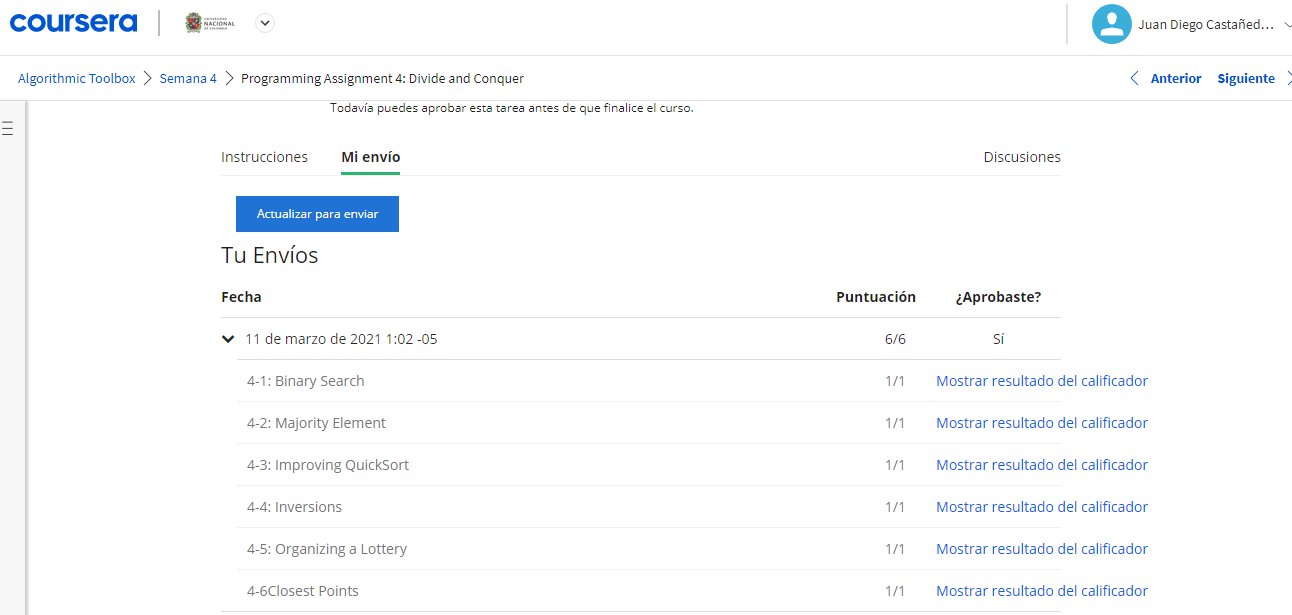